# Modeling Survey data

This document records modeling step. 

In [48]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *
from code.model_vis import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix,roc_curve
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
survey = survey('data/survey')

### use the data set whose categorical variables are converted to dummie variable

In [81]:
survey.cat_processor()

In [25]:
df_cat = survey.fin_data

In [83]:
survey.data.head(3)

,sphrs1,agekdbrn,maeduc,maeduc_not_app,maeduc_dn_kwn,paeduc,paeduc_not_app,paeduc_dn_kwn,speduc,speduc_not_app,...,fepresch,fefam,helpsick,discaff,fejobaff,discaffm,discaffw,goodlife,meovrwrk,employed
0,42,22,12,False,False,-99,True,False,-99,False,...,Not applicable,Not applicable,Agree with both,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Neither agree nor disagree,True
3,50,27,13,False,False,-99,True,False,16,False,...,Agree,Disagree,Not applicable,Not very likely,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,False
4,80,38,17,False,False,-99,True,False,16,False,...,Agree,Agree,4,Not very likely,Not applicable,Not applicable,Not applicable,Agree,Not applicable,False


In [26]:
y = df_cat.pop('employed').values
X = df_cat.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest model

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
rf.score(X_test,y_test)

0.83860121049092129

[[390 151]
 [ 89 857]]


/home/yihua/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


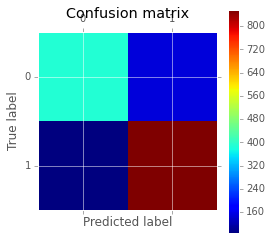

In [39]:
plot_confusion_matrix(rf,X_test,y_test)

roc_auc_score : 0.878622119401


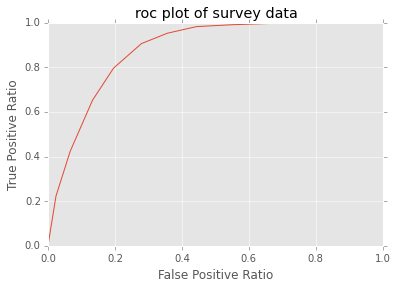

In [47]:
plot_roc(rf,X_test,y_test)


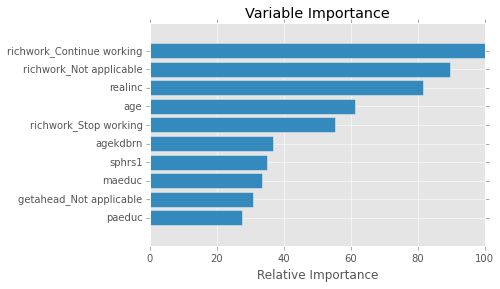

In [49]:
plot_importance(rf,df_cat)

In [85]:
df_cat.head(3).T

,0,3,4
sphrs1,42,50,80
agekdbrn,22,27,38
maeduc,12,13,17
maeduc_not_app,False,False,False
maeduc_dn_kwn,False,False,False
paeduc,-99,-99,-99
paeduc_not_app,True,True,True
paeduc_dn_kwn,False,False,False
speduc,-99,16,16
speduc_not_app,False,False,False


### Use data set whose categorical variables are converted to numerical variables

In [82]:
survey.num_processor()

In [53]:
df_num = survey.fin_data

In [56]:
y = df_num.pop('employed').values
X = df_num.values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
rf.score(X_test,y_test)

0.84868863483523871

[[406 135]
 [ 90 856]]


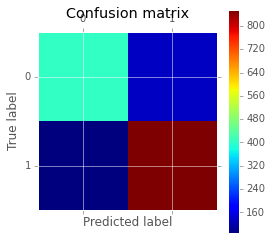

In [60]:
plot_confusion_matrix(rf,X_test,y_test)

roc_auc_score : 0.883683805341


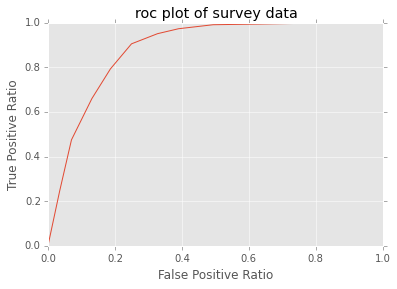

In [62]:
plot_roc(rf,X_test,y_test)

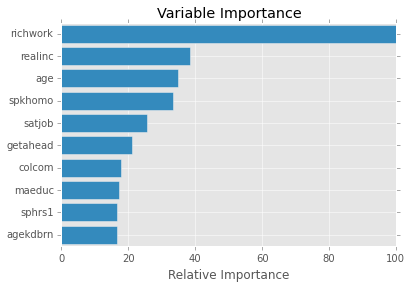

In [64]:
plot_importance(rf,df_num)

In [69]:
df = survey.data

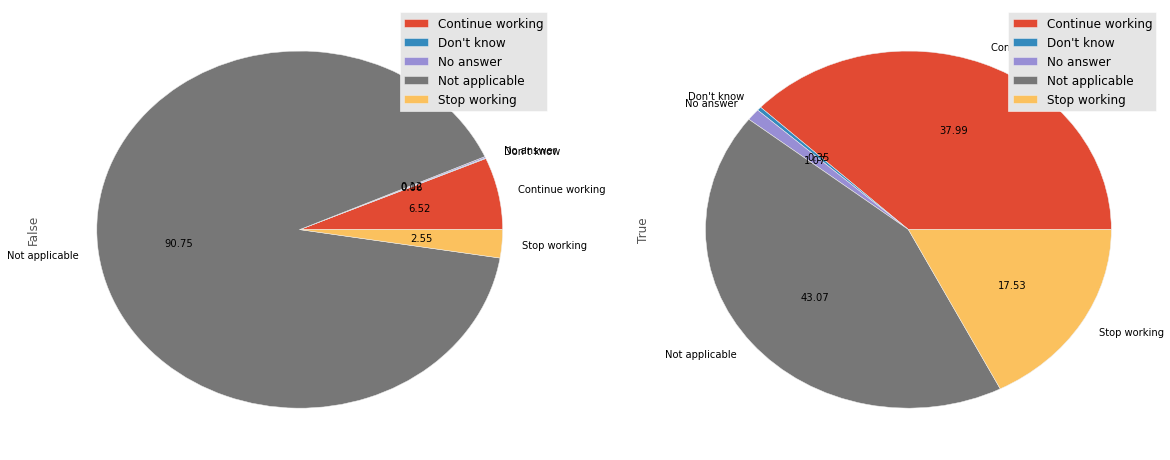

In [78]:
pie_chart(df.employed,df.richwork)

## richwork has information leakage. should drop this column

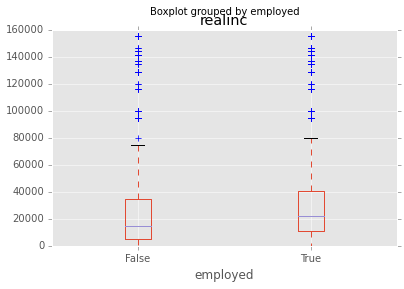

In [72]:
df.boxplot('realinc', by ="employed")

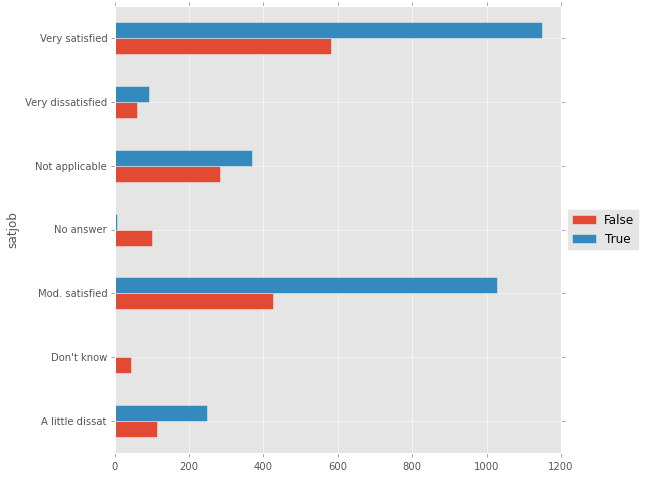

In [89]:
h_bar(df.satjob,df.employed)

## Only unemployed respondent checked "no answer" and "don't know". It is likely that they thought this question is asking about job, and since they don't work, they just pass this quesiton. Should drop this column

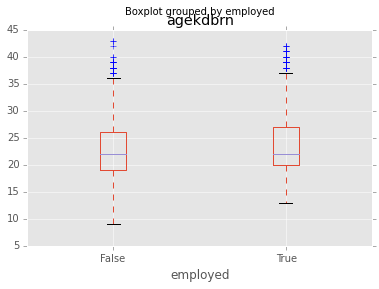

In [79]:
df.boxplot('agekdbrn', by ="employed")

## To do:
1. numerica dataframe yields higher roc. should use this.
1. download more features

2. drop all the questions related to work

3. grid search. 
4. check feature contribution


